In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chisquare
from scipy.stats import shapiro, normaltest, norm
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as ticker
df = pd.read_csv('./data/data.csv')
df.dropna(inplace=True)
df['Main Genre'] = df['Genres'].str.split(',').str[0].str.strip()
prog =0

In [2]:
#Najczęśćiej i najrzadziej oglądani reżyserzy
directors_df = df[['Directors']].copy()

directors_df['Watched_movies'] = directors_df['Directors'].map(df['Directors'].value_counts())

print(directors_df['Directors'].value_counts())

Directors
Christopher Nolan    7
Stanley Kubrick      6
Quentin Tarantino    4
Todd Phillips        3
Clint Eastwood       3
                    ..
Mary Harron          1
McG                  1
Gus Van Sant         1
David Michôd         1
Michael Chaves       1
Name: count, Length: 127, dtype: int64


Rozkład liczby obejrzanych filmów dla reżyserów:
Watched_movies
1    105
2     12
3      7
6      1
4      1
7      1
Name: count, dtype: int64 

Chi2 = 403.13, p-value = 0.000


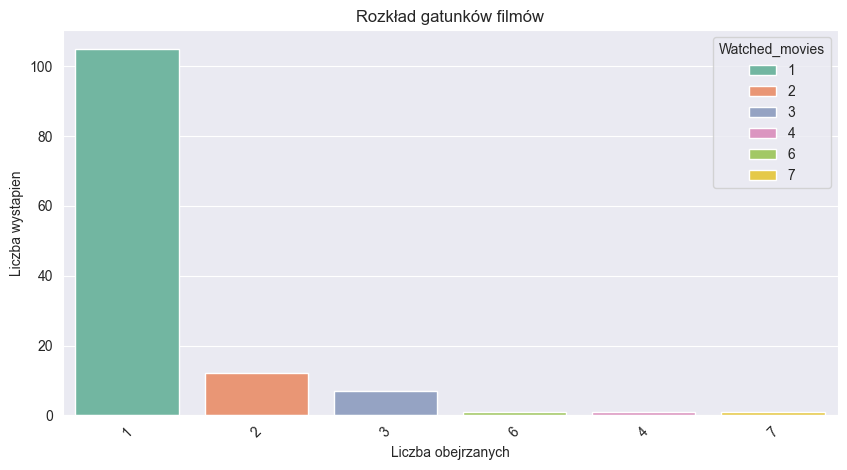

Reżyserzy, których obejrzałem co najmniej 3 filmy:
            Directors  Watched_movies
2     Martin Scorsese               3
13    Robert Zemeckis               3
20    Stanley Kubrick               6
26  Quentin Tarantino               4
33      Todd Phillips               3
46      David Fincher               3
61         Luc Besson               3
65     Clint Eastwood               3
75  Christopher Nolan               7
93       Milos Forman               3 



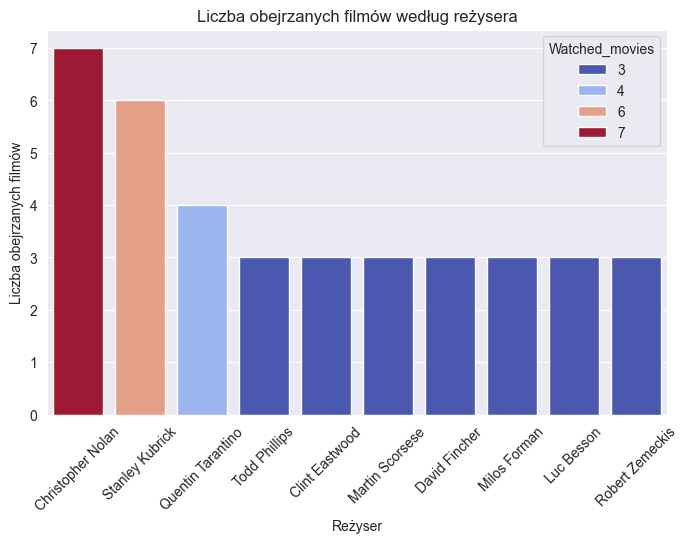

In [3]:

directors_df = df[['Directors']].drop_duplicates().copy()

directors_df['Watched_movies'] = directors_df['Directors'].map(df['Directors'].value_counts())

# Wyświetla rozkład liczby obejrzanych filmów tego samego reżysera
print("Rozkład liczby obejrzanych filmów dla reżyserów:")
print(directors_df['Watched_movies'].value_counts(), '\n')

prog_rezyser=0

observed = directors_df['Watched_movies'].value_counts().values
expected = [len(directors_df)/len(observed)] * len(observed)
chi2, p = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi2 = {chi2:.2f}, p-value = {p:.3f}")
plt.figure(figsize=(10,5))
sns.countplot(data=directors_df, x='Watched_movies', order=directors_df['Watched_movies'].value_counts().index, palette='Set2',hue='Watched_movies')
plt.title('Rozkład gatunków filmów')
plt.xlabel('Liczba obejrzanych')
plt.ylabel('Liczba wystapien')
plt.xticks(rotation=45)
plt.show()

time.sleep(3)

if p < 0.05:
    prog_rezyser = int(input('Rozklad nie jest rownomierny ustal próg min. liczby obejrzanych filmow rezysera (liczba całkowita) i kliknij enter'))


print(f"Reżyserzy, których obejrzałem co najmniej {prog_rezyser} filmy:")
print(directors_df[directors_df['Watched_movies'] >= prog_rezyser], '\n')

# Najczęściej oglądani reżyserzy top x
x = 10

plt.figure(figsize=(8,5))
sns.barplot(
    data=directors_df.sort_values('Watched_movies', ascending=False).head(x),
    x='Directors',
    y='Watched_movies',
    palette='coolwarm',
    hue='Watched_movies',
)
plt.title('Liczba obejrzanych filmów według reżysera')
plt.ylabel('Liczba obejrzanych filmów')
plt.xlabel('Reżyser')
plt.xticks(rotation=45)
plt.show()



Top 10 reżyserów według mojej oceny (przynajmniej 3 filmy):
           Directors  Watched_movies  Average_Rating
0    Robert Zemeckis               3        9.000000
1      David Fincher               3        8.333333
2     Clint Eastwood               3        8.000000
3       Milos Forman               3        8.000000
4    Stanley Kubrick               6        7.833333
5  Quentin Tarantino               4        7.750000
6         Luc Besson               3        7.333333
7  Christopher Nolan               7        7.142857
8    Martin Scorsese               3        7.000000
9      Todd Phillips               3        7.000000


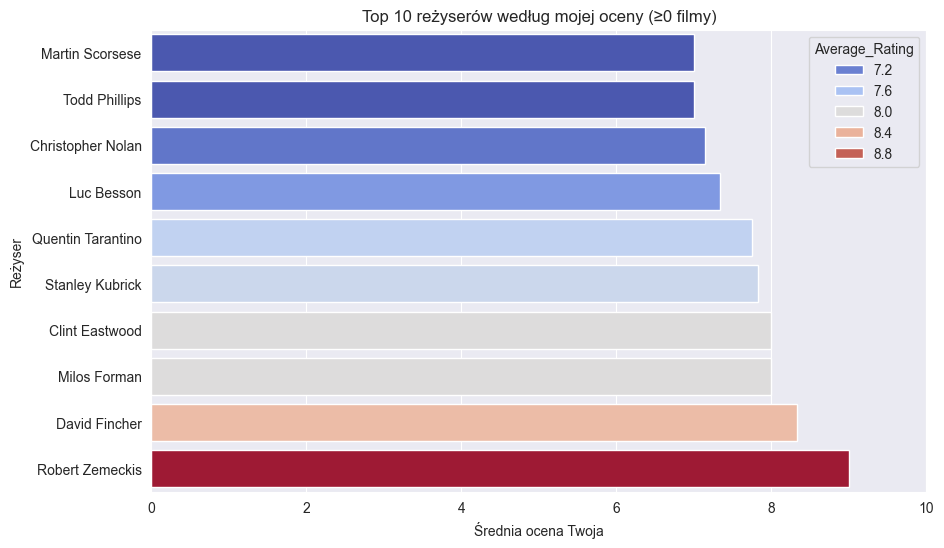

In [6]:
#Wyświetla top x reżyserów, których obejrzałem co najmniej prog filmów
x = 10


directors_df = df[['Directors']].drop_duplicates().copy()
directors_df['Watched_movies'] = directors_df['Directors'].map(df['Directors'].value_counts())

mean_ratings = df.groupby('Directors')['Your Rating'].mean()
directors_df['Average_Rating'] = directors_df['Directors'].map(mean_ratings)

filtered_df = directors_df[directors_df['Watched_movies'] >= prog_rezyser]

top_directors = filtered_df.sort_values(by='Average_Rating', ascending=False, ignore_index=True)
top_directors.drop_duplicates(subset='Directors', inplace=True)

print(f"Top 10 reżyserów według mojej oceny (przynajmniej {prog_rezyser} filmy):")
print(top_directors.head(x))

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_directors.head(x).sort_values('Average_Rating', ascending=True),
    x='Average_Rating',
    y='Directors',
    palette='coolwarm',
    hue='Average_Rating',
)
plt.title(f'Top {x} reżyserów według mojej oceny (≥{prog} filmy)')
plt.xlabel('Średnia ocena Twoja')
plt.ylabel('Reżyser')
plt.xlim(0, 10)
plt.show()